In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

F:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#load the dataset boston

boston = datasets.load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
#create the dataset from boston

features = pd.DataFrame(boston.data,columns=boston.feature_names)

In [5]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
targets = boston.target

In [7]:
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
#From the above data the dataset has all the numerical values with no missing data. Let's create the Random Forest model without 
#modifying the data 

In [10]:
target = pd.DataFrame(targets,columns=['target'])

In [11]:
target.columns

Index(['target'], dtype='object')

## Correlation between the dependent and independent features

In [12]:
features1  = features.copy()
features1['price'] = boston.target
features1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
#check how the features are correlated with the overall ratings

for f in features.columns:
    related = target['target'].corr(features[f])
    print("%s: %f" % (f,related))

CRIM: -0.385832
ZN: 0.360445
INDUS: -0.483725
CHAS: 0.175260
NOX: -0.427321
RM: 0.695360
AGE: -0.376955
DIS: 0.249929
RAD: -0.381626
TAX: -0.468536
PTRATIO: -0.507787
B: 0.333461
LSTAT: -0.737663


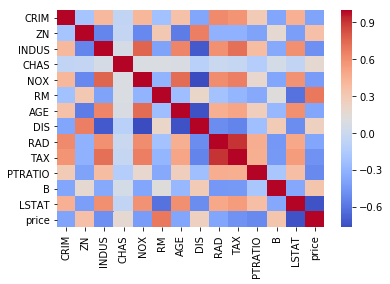

In [14]:
sns.heatmap(features1.corr(), cmap='coolwarm')

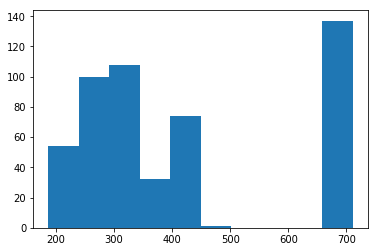

In [15]:
plt.hist(features['TAX'])
plt.show()

## Buidling the model 

In [16]:
#split the data into train and test 

x_train, x_test , y_train,y_test = train_test_split(features,targets,test_size=0.3)

In [17]:
#fit the model 

model1 = RandomForestRegressor()
model1

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
fit1= model1.fit(x_train,y_train)

In [19]:
predict = fit1.predict(x_test)
predict

array([21.24, 19.89, 28.83, 18.13, 26.88, 15.74, 25.92, 33.73, 46.29,
       24.66, 30.38, 16.67, 25.36, 21.77, 29.55, 48.83, 20.74, 23.38,
       19.47, 12.71, 20.08, 18.79, 14.24, 23.66, 40.04, 19.29, 24.94,
       23.99, 16.44, 16.47, 25.7 , 17.08, 21.58, 11.68, 15.92, 16.15,
       12.31, 17.76,  9.91, 17.11, 28.87, 29.04,  8.48, 24.54, 19.92,
       16.02, 16.25, 28.81, 14.97, 43.23, 23.68, 19.13, 19.8 , 11.65,
       14.86, 27.03, 24.46, 13.58, 28.93, 20.61, 34.54, 14.23, 11.71,
       16.16, 17.36, 20.37, 25.18, 34.88, 24.61, 15.11, 16.66, 16.36,
        8.14, 25.28, 13.69, 20.37, 32.83, 23.06, 21.1 , 43.57, 23.36,
       31.54, 23.44, 20.77, 21.5 , 23.52, 19.01, 41.24, 10.71, 20.57,
       22.42, 26.22, 20.19, 23.79, 30.65,  8.63, 23.88, 29.29, 17.39,
       39.66, 13.71, 45.08, 23.48, 18.99, 14.65, 21.23, 19.92, 21.5 ,
       19.97, 22.62, 19.66, 28.49, 18.15, 10.87, 21.03, 33.8 , 24.64,
       23.69, 24.43, 27.75, 41.47,  8.54, 18.49, 27.24, 27.18, 23.19,
       19.76, 19.63,

In [20]:
fit1.score(x_test,y_test)

0.8612648289055511

#### The Randon forest Regressor gives 80% accuracy without changing the boston dataset features.

## Let's Normalize the Dataset using StandardScaler

In [21]:
scaler = StandardScaler().fit(x_train)

In [22]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
X_train_scaled = pd.DataFrame(scaler.transform(x_train), index=x_train.index.values, columns=x_train.columns.values)

In [24]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
325,-0.396990,-0.487988,-0.550610,-0.238152,-0.559727,0.240233,-1.991890,0.816276,-0.542105,-0.732230,0.521504,0.407525,-1.072507
427,3.909488,-0.487988,1.009731,-0.238152,1.050371,-0.090032,0.366241,-0.914609,1.620527,1.487941,0.800797,-3.479908,0.226108
245,-0.397051,0.457281,-0.771853,-0.238152,-1.096426,-0.951029,0.053052,2.053179,-0.314459,-0.480337,0.288760,0.360340,0.768115
177,-0.412806,-0.487988,-1.035306,-0.238152,-0.412567,0.072937,0.170958,-0.205984,-0.542105,-0.679508,-0.874959,0.427436,-0.906053
193,-0.416528,2.090018,-1.198326,-0.238152,-1.356120,0.772407,-2.168750,1.207808,-0.997396,-0.861105,-1.340447,0.404310,-1.079385


In [25]:
#original dataset 
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
325,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
427,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
177,0.05425,0.0,4.05,0.0,0.510,6.315,73.4,3.3175,5.0,296.0,16.6,395.60,6.29
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03


In [26]:
X_test_scaled = pd.DataFrame(scaler.transform(x_test), index=x_test.index.values, columns=x_test.columns.values)

In [27]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
77,-0.409034,-0.487988,0.242660,-0.238152,-1.044488,-0.179449,-0.845986,0.170592,-0.542105,-0.081995,0.102565,0.337836,-0.358544
61,-0.399306,0.586181,-0.878107,-0.238152,-0.905985,-0.430392,0.907874,1.499569,-0.200637,-0.749804,0.568053,0.245747,0.215103
349,-0.415709,1.230683,-1.442858,-0.238152,-1.113739,0.972874,-1.262343,2.461031,-0.997396,-0.451047,0.568053,0.367806,-0.961079
154,-0.256546,-0.487988,1.225151,4.198997,2.712408,-0.195313,1.003673,-0.969902,-0.542105,-0.052705,-1.759386,-0.345986,0.308647
263,-0.324193,0.371347,-1.046950,-0.238152,0.773365,1.532449,0.948404,-0.809431,-0.542105,-0.866963,-2.550716,0.404828,-0.223730


In [28]:
rf = model1.fit(X_train_scaled,y_train)

In [29]:
rf.score(X_test_scaled,y_test)

0.8608400579319541

#### The Randon forest Regressor gives 80.43% accuracy after normalizing  the boston dataset features.

## Let's increase the n-estimator's (increasing the decision tree for building the Random Forest Model)

#### Number Decision Tree = 100 and Max Depth = 5 

In [30]:
rf = RandomForestRegressor(n_estimators=100 , max_depth=5 , random_state=5)
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [31]:
fit = rf.fit(x_train,y_train)

In [32]:
fit.score(x_test,y_test)

0.8592876361402656

#### the accuracy score incresed little bit 

## Number of Decision Tree=500 and Max Depth =6

In [33]:
rf = RandomForestRegressor(n_estimators=500 , max_depth=6, random_state=5)
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [34]:
fit = rf.fit(x_train,y_train)

In [35]:
fit.score(x_test,y_test)

0.8725622013093088

### the accuracy score incresed by 1%

### Number of Decision Tree=500 and Max Depth=10`

In [36]:
rf = RandomForestRegressor(n_estimators=500 , max_depth=10, random_state=5)
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [37]:
fit = rf.fit(x_train,y_train)

In [38]:
fit.score(x_test,y_test)

0.8824333505084165

#### the accuracy score incresed by 1%